# Benchmark: Image classification for MNIST

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

from plot.learning_curve import plot_learning_curve

## Step 1: Create your input pipeline

### Load a dataset

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Metal device set to: Apple M1


2022-12-03 14:46:11.572649: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-03 14:46:11.572754: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Build a training pipeline

In [3]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

### Build an evaluation pipeline

In [4]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

## Step 2: Create and train the model

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)

Epoch 1/10
 21/469 [>.............................] - ETA: 2s - loss: 1.5153 - sparse_categorical_accuracy: 0.5986 

2022-12-03 14:47:02.628465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


462/469 [============================>.] - ETA: 0s - loss: 0.3587 - sparse_categorical_accuracy: 0.9008

2022-12-03 14:47:04.902244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 3s 5ms/step - loss: 0.3566 - sparse_categorical_accuracy: 0.9015 - val_loss: 0.1916 - val_sparse_categorical_accuracy: 0.9465
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1631 - sparse_categorical_accuracy: 0.9533 - val_loss: 0.1369 - val_sparse_categorical_accuracy: 0.9596
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1172 - sparse_categorical_accuracy: 0.9664 - val_loss: 0.1107 - val_sparse_categorical_accuracy: 0.9677
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0907 - sparse_categorical_accuracy: 0.9736 - val_loss: 0.0982 - val_sparse_categorical_accuracy: 0.9696
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0734 - sparse_categorical_accuracy: 0.9791 - val_loss: 0.0902 - val_sparse_categorical_accuracy: 0.9725
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0602 - sparse_categorical_accuracy:

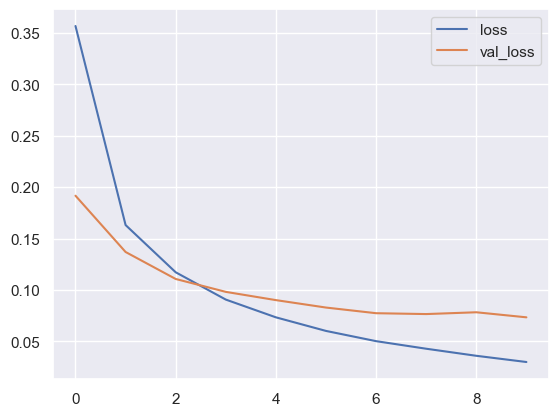

In [8]:
plot_learning_curve(history=history, filepath="figs/learning_curve_mnist_benchmark.png")